In [2]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
base_dir = "dataset2/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

In [5]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


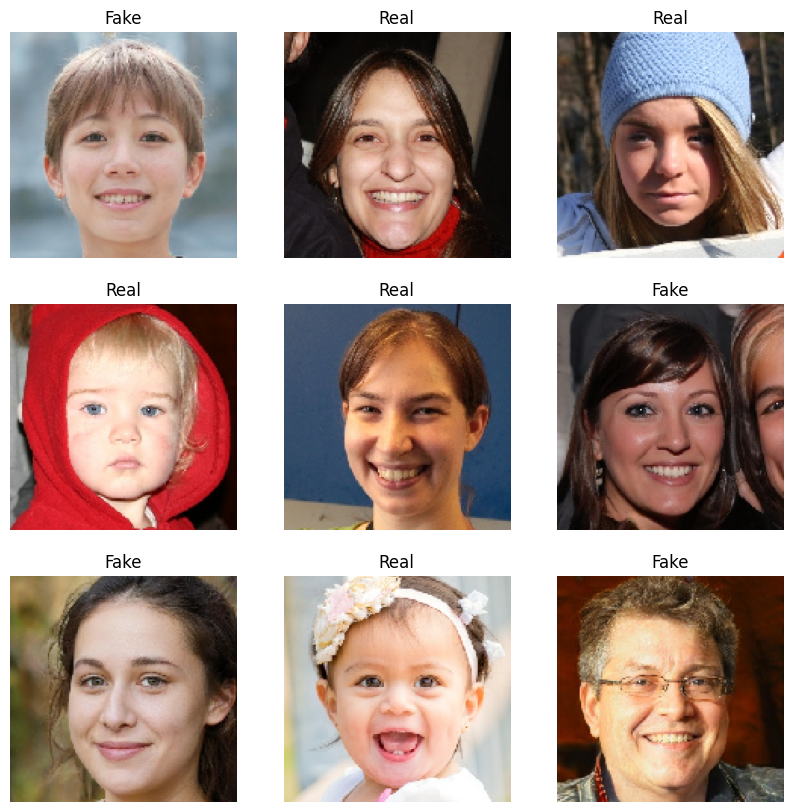

In [8]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = next(train_generator)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Fake")
    else:
        plt.title("Real")
    plt.axis("off")

In [9]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

d:\Internships\Zidio\Project1\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
tf.keras.utils.pydot = pydot

In [11]:
plot_model(model, to_file='model.png', show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1064)           │    39,360,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,455,930 (150.51 MB)

 Trainable params: 39,455,930 (150.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 50, verbose=1)

d:\Internships\Zidio\Project1\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1226s 1s/step - accuracy: 0.6693 - loss: 0.6548 - val_accuracy: 0.8554 - val_loss: 0.3317
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1292s 1s/step - accuracy: 0.8760 - loss: 0.2944 - val_accuracy: 0.9104 - val_loss: 0.2180
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1232s 1s/step - accuracy: 0.9311 - loss: 0.1757 - val_accuracy: 0.9252 - val_loss: 0.1828
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1169s 1s/step - accuracy: 0.9556 - loss: 0.1129 - val_accuracy: 0.9430 - val_loss: 0.1496
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1172s 1s/step - accuracy: 0.9764 - loss: 0.0644 - val_accuracy: 0.9490 - val_loss: 0.1339
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1177s 1s/step - accuracy: 0.9844 - loss: 0.0423 - val_accuracy: 0.9474 - val_loss: 0.1634
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1188s 1s/step - accuracy: 0.9889 - loss: 0.0297 - val_accuracy: 0.9512 - val_loss: 0.1608
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1141s 1s/step - accuracy: 0.9915 -

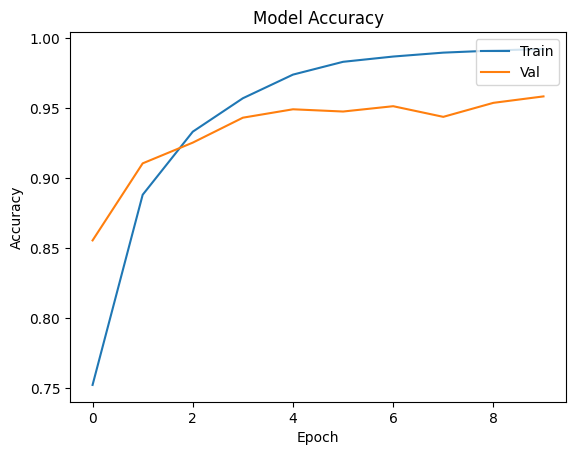

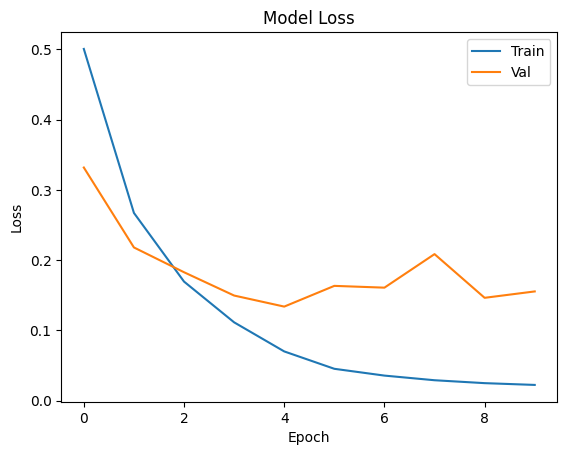

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_generator)

200/200 ━━━━━━━━━━━━━━━━━━━━ 90s 449ms/step - accuracy: 0.9528 - loss: 0.1759


In [17]:
model.save("SpoofPredictionModel.h5")

# This one is the best for spoof detection